cpu


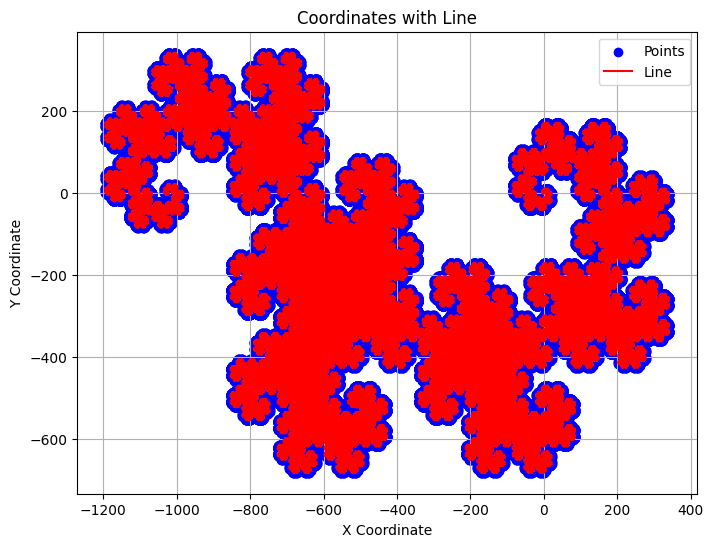

In [82]:
import torch
import math
import matplotlib.pyplot as plt
import numpy as np

# Device configuration
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device=torch.device('cpu')
print(device)


def rotate_coordinates(coordinates, center, angle_degrees):
    # Convert angle to radians
    angle_radians = math.radians(angle_degrees)
    
    # Create rotation matrix
    rotation_matrix = torch.tensor([
        [math.cos(angle_radians), -math.sin(angle_radians)],
        [math.sin(angle_radians), math.cos(angle_radians)]
    ], device=device)
    
    # Translate coordinates to the origin
    translated_coords = coordinates - center
    
    # Apply rotation
    rotated_coords = torch.mm(translated_coords, rotation_matrix.t())
    
    # Translate coordinates back to the original position
    rotated_coords += center
    return rotated_coords

def plot_coordinates_with_line(coordinates, origin, title="Coordinates with Line"):
    x_coords = coordinates[:, 0]
    y_coords = coordinates[:, 1]
    
    plt.figure(figsize=(8, 6))
    plt.scatter(x_coords, y_coords, color='blue', label='Points')
    plt.scatter(origin[0],origin[1], color='red')
    plt.plot(x_coords, y_coords, color='red', label='Line')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.savefig("dcurve-cpu-Xsec.png")
    plt.show()

# Define the original coordinates and the center of rotation
coordinates = torch.tensor([[0.0, 0.0], [1.0, 0.0]], device=device)
origin = coordinates[-1]
# plot_coordinates_with_line(coordinates, origin)

num_iterations = 20
for i in range(num_iterations):
    origin = coordinates[-1]
    # Rotate the coordinates by 45 degrees
    rotated_coords = rotate_coordinates(coordinates, origin, 90)

    # Append the two tensors along the 0th dimension (vertical stacking)
    rotated_coords = rotated_coords[:-1].flip(0)
    new_coordinates = torch.cat((coordinates, rotated_coords), dim=0)

    # plot_coordinates(new_coordinates, origin)
    coordinates = new_coordinates
plot_coordinates_with_line(new_coordinates.cpu(), origin.cpu())